# Exploratory Data Analysis & Preprocessing of the BBC NEWS Dataset

### Data loading and cleaning

In [1]:
import os
import string
import pandas as pd
import spacy
import numpy as np
from octis.preprocessing.preprocessing import Preprocessing
from octis.dataset.dataset import Dataset
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict, Counter


/Users/edo/miniconda3/envs/OCTIS/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [2]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

from preprocessing.clean_text import *
from utils.graph_tools import *


Model 'en_core_web_sm' not found. Downloading the model...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.2 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
extract_corpus_and_labels_from_directory(base_path = 'data/bbc/', output_path = 'data/input')

Corpus has been saved to data/input/corpus.txt
Labels have been saved to data/input/labels.txt


In [4]:
# Define file paths
corpus_file = 'data/input/corpus.txt'
labels_file = 'data/input/labels.txt'

# Read the files
with open(corpus_file, 'r', encoding='utf-8') as f:
    documents = f.readlines()

documents = [doc.strip() for doc in documents]  # Remove leading/trailing spaces

with open(labels_file, 'r', encoding='utf-8') as f:
    labels = f.readlines()

labels = [label.strip() for label in labels]  


df = pd.DataFrame({'document': documents, 'genre': labels})

In [5]:
df.head()

,document,genre
0,Musicians to tackle US red tape Musicians' gro...,entertainment
1,"U2's desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer P...,entertainment
3,Snicket tops US box office chart The film adap...,entertainment
4,Ocean's Twelve raids box office Ocean's Twelve...,entertainment


In [6]:
# Remove NA values and duplicates
df = df.dropna()
df = df.drop_duplicates()

In [7]:
# Get a summary of the dataset (number of records, data types)
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 2125 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  2125 non-null   object
 1   genre     2125 non-null   object
dtypes: object(2)
memory usage: 49.8+ KB
None
(2125, 2)


In [8]:
# Save the cleaned dataset back to the same files
with open(corpus_file, 'w', encoding='utf-8') as f:
    f.writelines(df['document'].astype(str) + '\n')

with open(labels_file, 'w', encoding='utf-8') as f:
    f.writelines(df['genre'].astype(str) + '\n')

### Data preprocessing

In [9]:
nlp = spacy.load('en_core_web_sm')

In [10]:
preprocessor = Preprocessing(lowercase=True,
                             min_df = 10,
                             max_df = 0.85,
                             remove_punctuation=True,
                             punctuation=string.punctuation,
                             remove_numbers=True,
                             lemmatize= True,
                             stopword_list=CUSTOM_STOPWORDS,
                             min_chars=3,
                             min_words_docs=10,
                             language='english',
                             split=True,
                             verbose=True)

In [11]:
dataset = preprocessor.preprocess_dataset(documents_path = 'data/input/corpus.txt',labels_path = 'data/input/labels.txt')
dataset.save('data/processed/dataset')

100%|██████████| 2125/2125 [02:19<00:00, 15.21it/s]


created vocab
4055
words filtering done


### Exploratory data analysis on preprocessed data

In [12]:
dataset.get_metadata()

{'total_documents': 2125,
 'vocabulary_length': 4055,
 'preprocessing-info': ['lowercase',
  'remove_punctuation',
  'lemmatize',
  'filter words with document frequency lower than 10 and higher than 0.85',
  'filter words with less than 3 character',
  'filter documents with less than 10 words'],
 'last-training-doc': 1487,
 'last-validation-doc': 1806}

/Users/edo/Desktop/UniTrieste/1°sem_2°anno/🟢🟡[gennaio]Prob_ML/progetto_generative_topics_distribution/pml_project_python/LatentDirichletAllocation/utils/graph_tools.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(words), y=list(counts), palette=[color_map.get(genre, 'gray')], edgecolor='black')
/Users/edo/Desktop/UniTrieste/1°sem_2°anno/🟢🟡[gennaio]Prob_ML/progetto_generative_topics_distribution/pml_project_python/LatentDirichletAllocation/utils/graph_tools.py:37: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=list(words), y=list(counts), palette=[color_map.get(genre, 'gray')], edgecolor='black')


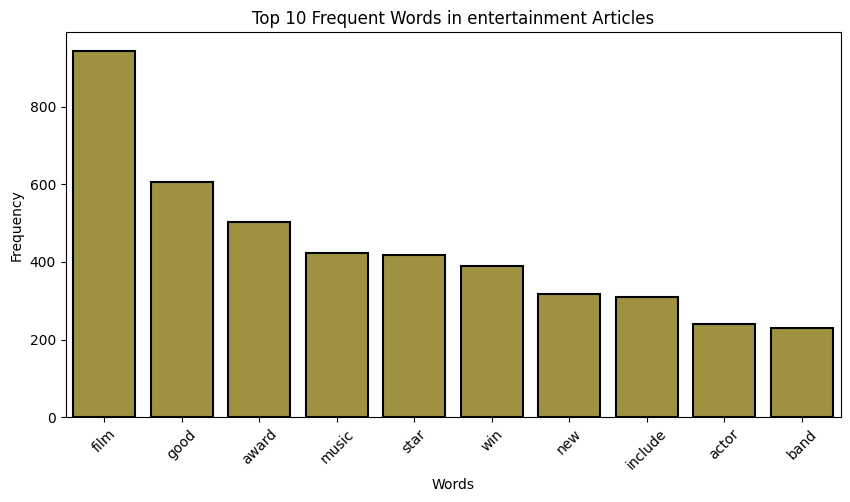

/Users/edo/Desktop/UniTrieste/1°sem_2°anno/🟢🟡[gennaio]Prob_ML/progetto_generative_topics_distribution/pml_project_python/LatentDirichletAllocation/utils/graph_tools.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(words), y=list(counts), palette=[color_map.get(genre, 'gray')], edgecolor='black')
/Users/edo/Desktop/UniTrieste/1°sem_2°anno/🟢🟡[gennaio]Prob_ML/progetto_generative_topics_distribution/pml_project_python/LatentDirichletAllocation/utils/graph_tools.py:37: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=list(words), y=list(counts), palette=[color_map.get(genre, 'gray')], edgecolor='black')


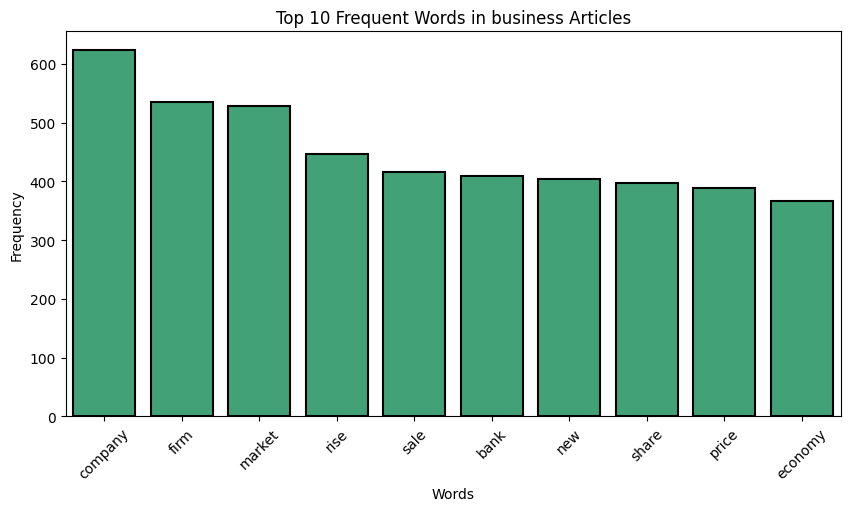

/Users/edo/Desktop/UniTrieste/1°sem_2°anno/🟢🟡[gennaio]Prob_ML/progetto_generative_topics_distribution/pml_project_python/LatentDirichletAllocation/utils/graph_tools.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(words), y=list(counts), palette=[color_map.get(genre, 'gray')], edgecolor='black')
/Users/edo/Desktop/UniTrieste/1°sem_2°anno/🟢🟡[gennaio]Prob_ML/progetto_generative_topics_distribution/pml_project_python/LatentDirichletAllocation/utils/graph_tools.py:37: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=list(words), y=list(counts), palette=[color_map.get(genre, 'gray')], edgecolor='black')


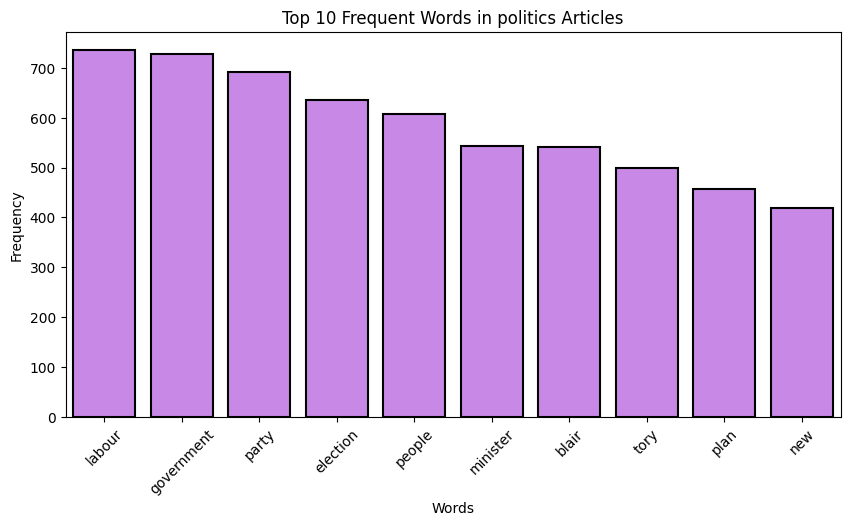

/Users/edo/Desktop/UniTrieste/1°sem_2°anno/🟢🟡[gennaio]Prob_ML/progetto_generative_topics_distribution/pml_project_python/LatentDirichletAllocation/utils/graph_tools.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(words), y=list(counts), palette=[color_map.get(genre, 'gray')], edgecolor='black')
/Users/edo/Desktop/UniTrieste/1°sem_2°anno/🟢🟡[gennaio]Prob_ML/progetto_generative_topics_distribution/pml_project_python/LatentDirichletAllocation/utils/graph_tools.py:37: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=list(words), y=list(counts), palette=[color_map.get(genre, 'gray')], edgecolor='black')


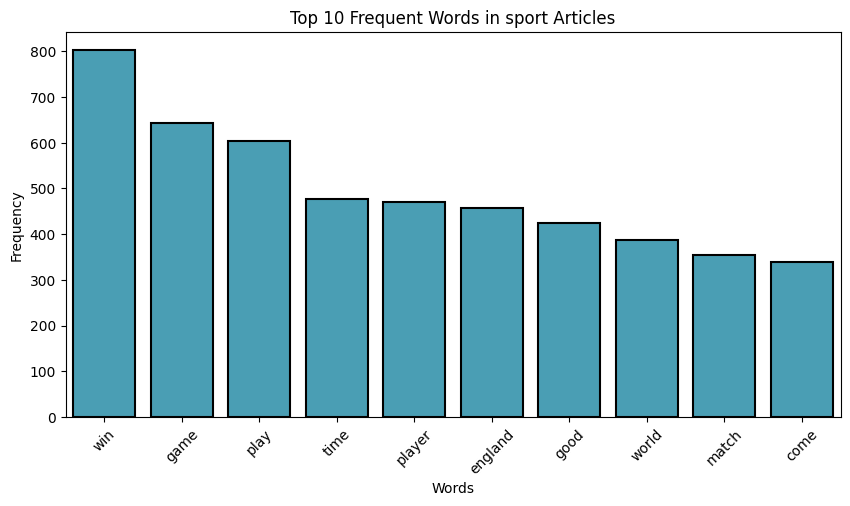

/Users/edo/Desktop/UniTrieste/1°sem_2°anno/🟢🟡[gennaio]Prob_ML/progetto_generative_topics_distribution/pml_project_python/LatentDirichletAllocation/utils/graph_tools.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(words), y=list(counts), palette=[color_map.get(genre, 'gray')], edgecolor='black')
/Users/edo/Desktop/UniTrieste/1°sem_2°anno/🟢🟡[gennaio]Prob_ML/progetto_generative_topics_distribution/pml_project_python/LatentDirichletAllocation/utils/graph_tools.py:37: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=list(words), y=list(counts), palette=[color_map.get(genre, 'gray')], edgecolor='black')


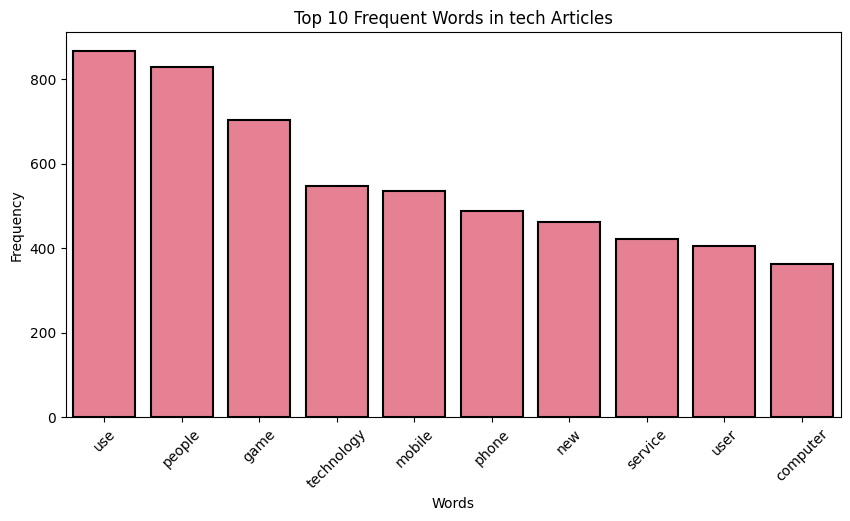

In [13]:
word_frequencies_barplot_dataset(dataset)

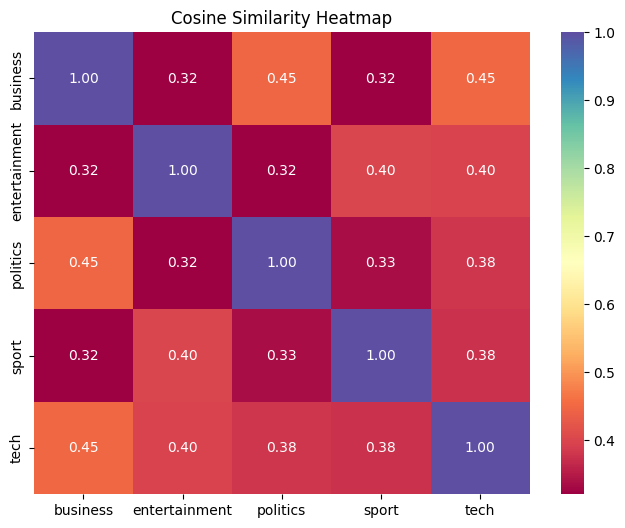

,business,entertainment,politics,sport,tech
business,1.000000,0.320798,0.445789,0.321127,0.448260
entertainment,0.320798,1.000000,0.321858,0.401127,0.396715
politics,0.445789,0.321858,1.000000,0.334519,0.381260
sport,0.321127,0.401127,0.334519,1.000000,0.375897
tech,0.448260,0.396715,0.381260,0.375897,1.000000


In [14]:
compute_genre_similarity(dataset=dataset)

/Users/edo/Desktop/UniTrieste/1°sem_2°anno/🟢🟡[gennaio]Prob_ML/progetto_generative_topics_distribution/pml_project_python/LatentDirichletAllocation/utils/graph_tools.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=word_count_df, palette='deep', edgecolor = 'black')


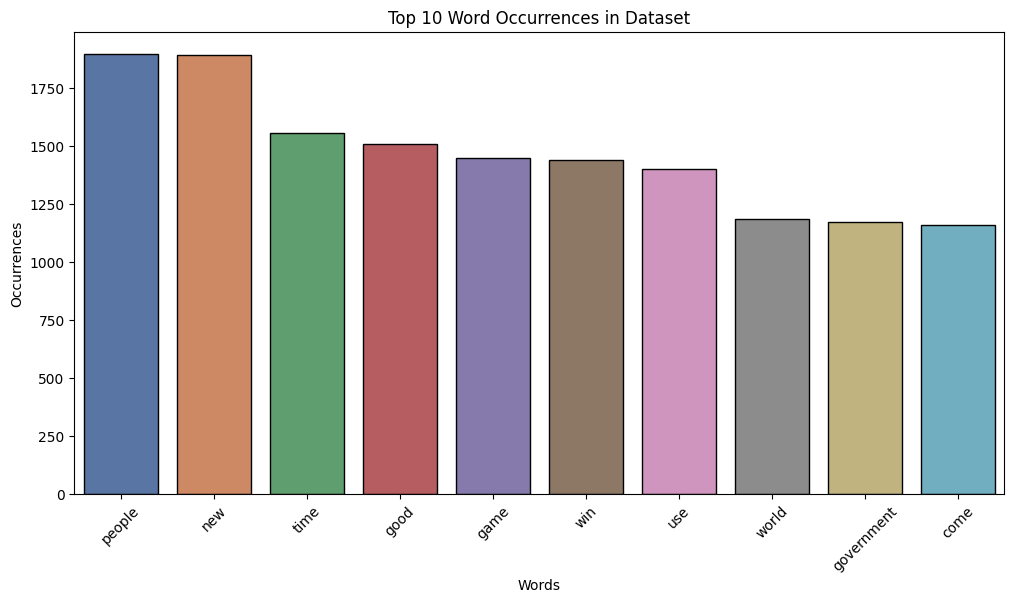

In [15]:
word_occurrences(dataset = dataset)